# End to End Data Science Project

## Use Case : Modelling Life & Death of a Patient

Note: The data below is synthetically generated by the Author

### Step 1: Import packages, modules, libraries

In [569]:
# Modules
from datetime import date
from datetime import datetime
import re

# Packages
import numpy as np
import pandas as pd

# Libraries/Packages from libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Step 2: Document Date & Time you ran a process

In [2]:
today = date.today()
d = today.strftime("%B %d, %Y")
print("Model run on: ",d)
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time, "EST")

Model run on:  December 05, 2022
Current Time = 12:33:16 EST


### Step 3: Importing Data & Prelimnary Inspection

In [689]:
df1 = pd.read_csv('set1.csv')
df2 = pd.read_csv('set2.csv')
df3 = pd.read_csv('set3.csv')

In [639]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              102 non-null    int64 
 1   Gender                  102 non-null    object
 2   Age                     102 non-null    int64 
 3   email                   101 non-null    object
 4   Country                 102 non-null    object
 5   time_since_first_check  102 non-null    int64 
 6   status                  102 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.7+ KB


Did you notice a null value for the variable 'email' ? 

In [690]:
df1 = df1.dropna()
df1

,Unnamed: 0,Gender,Age,email,Country,time_since_first_check,status
0,0,F,20,Victoria@sgcancerhospitals.org,Australian,0,0
1,1,M,57,Kendyl@sgcancerhospitals.org,Australian,5,0
2,2,M,35,Emmary@sgcancerhospitals.org,Australian,5,1
3,3,M,50,Cailey@sgcancerhospitals.org,Australian,3,1
4,4,F,62,Emmary@sgcancerhospitals.org,Australian,0,0
...,...,...,...,...,...,...,...
97,97,F,43,Moira@gmail.com,Australian,0,0
98,98,F,43,Cailey@sgcancerhospitals.org,Australian,3,1
99,99,F,69,Aliaa@sgcancerhospitals.org,Australian,0,1
100,100,M,68,Victoria@sgcancerhospitals.org,Australian,3,1


In [641]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              101 non-null    int64 
 1   Gender                  101 non-null    object
 2   Age                     101 non-null    int64 
 3   email                   101 non-null    object
 4   Country                 101 non-null    object
 5   time_since_first_check  101 non-null    int64 
 6   status                  101 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.3+ KB


In [642]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              102 non-null    int64 
 1   Gender                  102 non-null    object
 2   Age                     102 non-null    int64 
 3   email                   102 non-null    object
 4   Country                 102 non-null    object
 5   time_since_first_check  102 non-null    int64 
 6   status                  102 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.7+ KB


In [643]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              102 non-null    int64 
 1   Gender                  102 non-null    object
 2   Age                     102 non-null    int64 
 3   email                   102 non-null    object
 4   Country                 102 non-null    object
 5   time_since_first_check  102 non-null    int64 
 6   status                  102 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.7+ KB


In [691]:
df1 = df1.drop(columns=['Unnamed: 0'])
df1

,Gender,Age,email,Country,time_since_first_check,status
0,F,20,Victoria@sgcancerhospitals.org,Australian,0,0
1,M,57,Kendyl@sgcancerhospitals.org,Australian,5,0
2,M,35,Emmary@sgcancerhospitals.org,Australian,5,1
3,M,50,Cailey@sgcancerhospitals.org,Australian,3,1
4,F,62,Emmary@sgcancerhospitals.org,Australian,0,0
...,...,...,...,...,...,...
97,F,43,Moira@gmail.com,Australian,0,0
98,F,43,Cailey@sgcancerhospitals.org,Australian,3,1
99,F,69,Aliaa@sgcancerhospitals.org,Australian,0,1
100,M,68,Victoria@sgcancerhospitals.org,Australian,3,1


In [692]:
df2.drop(columns=['Unnamed: 0'], inplace=True)
df3.drop(columns=['Unnamed: 0'], inplace=True)

### Step 4: Plot some prelimnary data to get an idea of what you are working with

In [646]:
df1.columns

Index(['Gender', 'Age', 'email', 'Country', 'time_since_first_check',
       'status'],
      dtype='object')

In [693]:
d={'0':0,'1':1}
def diction(x):
    if x==0:
        d['0']+=1
    else:
        d['1']+=1
    return

In [694]:
df1['status'].apply(diction)

0      None
1      None
2      None
3      None
4      None
       ... 
97     None
98     None
99     None
100    None
101    None
Name: status, Length: 101, dtype: object

In [695]:
d

{'0': 44, '1': 58}

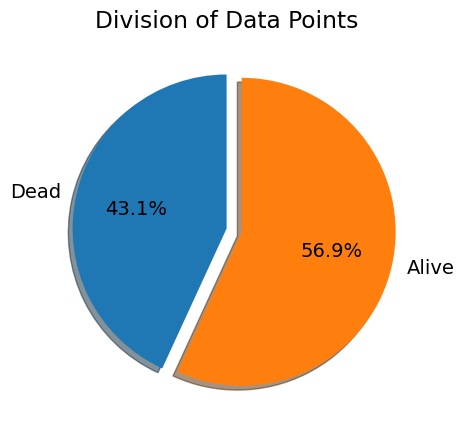

In [696]:
fig,ax=plt.subplots(figsize=(10,5))
plt.rcParams['font.size'] = 14.0
ax.pie(list(d.values()),labels=["Dead","Alive"],startangle=90,autopct='%1.1f%%',explode=(0,0.1),shadow=True)
plt.title('Division of Data Points')
plt.show()

<b>Pie-chart is definitely one of the popular ways to visualise categorical/class data. However, pandas offers another function to make this task even simpler!</b>

In [697]:
df2.status.value_counts()
print(df2.Gender.value_counts())
print(df2.Country.value_counts())

M    82
F    20
Name: Gender, dtype: int64
American    72
Canadian    30
Name: Country, dtype: int64


In [698]:
print(df3.status.value_counts())
print(df3.Gender.value_counts())
print(df3.Country.value_counts())

1    100
0      2
Name: status, dtype: int64
F    80
M    22
Name: Gender, dtype: int64
European    102
Name: Country, dtype: int64


Now, investigating numerical columns

In [653]:
plt.hist?

In [699]:
df1['Age'] == df1.Age

0      True
1      True
2      True
3      True
4      True
       ... 
97     True
98     True
99     True
100    True
101    True
Name: Age, Length: 101, dtype: bool

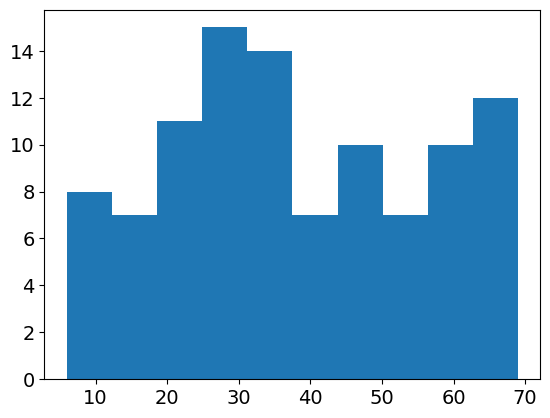

In [700]:
# raw
plt.hist(df1.Age)
plt.show()

In [450]:
plt.xticks?

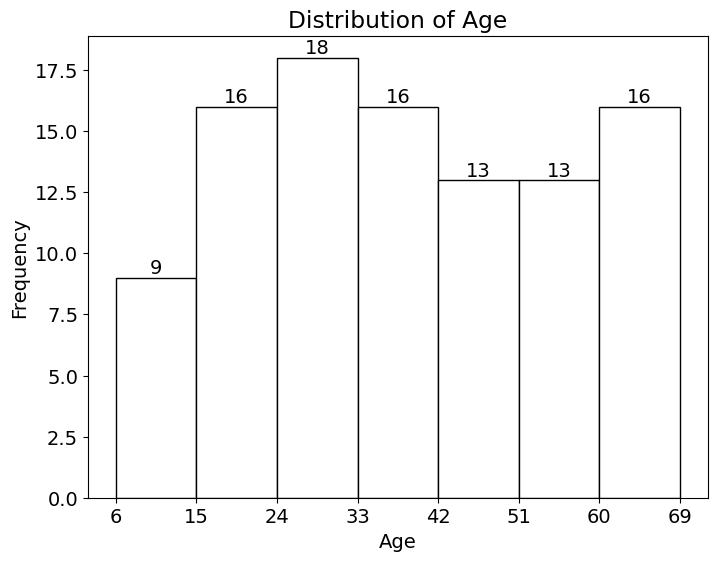

In [701]:
# formatted
plt.figure(figsize=(8,6))
values, bins, bars = plt.hist(df1['Age'], bins = 7, edgecolor = 'black', color = 'white')
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.bar_label(bars)
plt.xticks(np.arange(min(df1.Age), max(df1.Age)+1, step = 9))
plt.show()

In [702]:
temp1 = pd.DataFrame(df1['time_since_first_check'].copy())
temp1['set'] = 'df1'
temp1

,time_since_first_check,set
0,0,df1
1,5,df1
2,5,df1
3,3,df1
4,0,df1
...,...,...
97,0,df1
98,3,df1
99,0,df1
100,3,df1


In [703]:
temp2 = pd.DataFrame(df2['time_since_first_check'].copy())
temp2['set'] = 'df2'
temp3 = pd.DataFrame(df3['time_since_first_check'].copy())
temp3['set'] = 'df3'

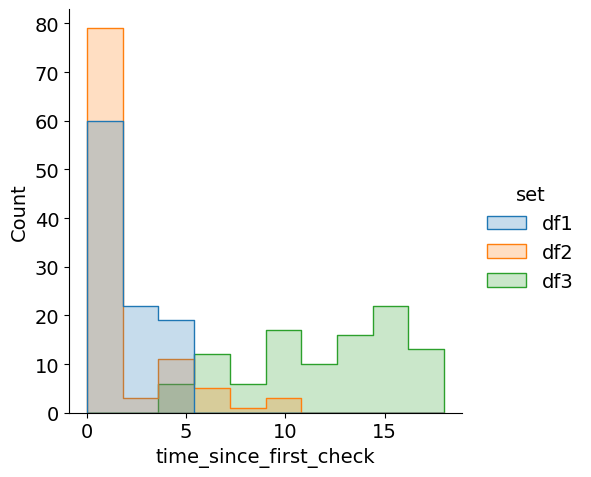

In [704]:
temp = pd.concat([temp1, temp2, temp3])
sns.displot(temp, x="time_since_first_check", hue='set', element="step")
plt.show()

time_since_first_check data looks seriously inconsistent between these different datasets. Need to inspect further while cleaning & preprocessing.

### Step 5: Data Preprocessing - Cleaning & Engineering

1. inspect time_since_first_check column

In [705]:
df3['time_since_first_check'] # this is in months

0      14
1      18
2       8
3      18
4      17
       ..
97     10
98      6
99     17
100     7
101    17
Name: time_since_first_check, Length: 102, dtype: int64

In [706]:
df1['time_since_first_check'], df2['time_since_first_check'] # this is in years

(0      0
 1      5
 2      5
 3      3
 4      0
       ..
 97     0
 98     3
 99     0
 100    3
 101    0
 Name: time_since_first_check, Length: 101, dtype: int64,
 0      0
 1      0
 2      0
 3      5
 4      0
       ..
 97     7
 98     4
 99     1
 100    0
 101    1
 Name: time_since_first_check, Length: 102, dtype: int64)

In [707]:
def modify_time(year):
    if year==0: 
        return 3
    else:
        return year*12

In [708]:
df1['time_since_first_check'] = df1['time_since_first_check'].apply(modify_time)
df2['time_since_first_check'] = df2['time_since_first_check'].apply(modify_time)

2. Merge and store data into a single dataframe

In [709]:
df = pd.concat([df1, df2, df3], axis=0)
df.reset_index(inplace=True, drop = True)
df

,Gender,Age,email,Country,time_since_first_check,status
0,F,20,Victoria@sgcancerhospitals.org,Australian,3,0
1,M,57,Kendyl@sgcancerhospitals.org,Australian,60,0
2,M,35,Emmary@sgcancerhospitals.org,Australian,60,1
3,M,50,Cailey@sgcancerhospitals.org,Australian,36,1
4,F,62,Emmary@sgcancerhospitals.org,Australian,3,0
...,...,...,...,...,...,...
300,F,22,Sruly@physionest.net,European,10,1
301,F,16,Lucie@physionest.net,European,6,1
302,F,26,Tula@physionest.net,European,17,1
303,F,18,Nyles@physionest.net,European,7,1


3. Regex Operations on the 'email' column

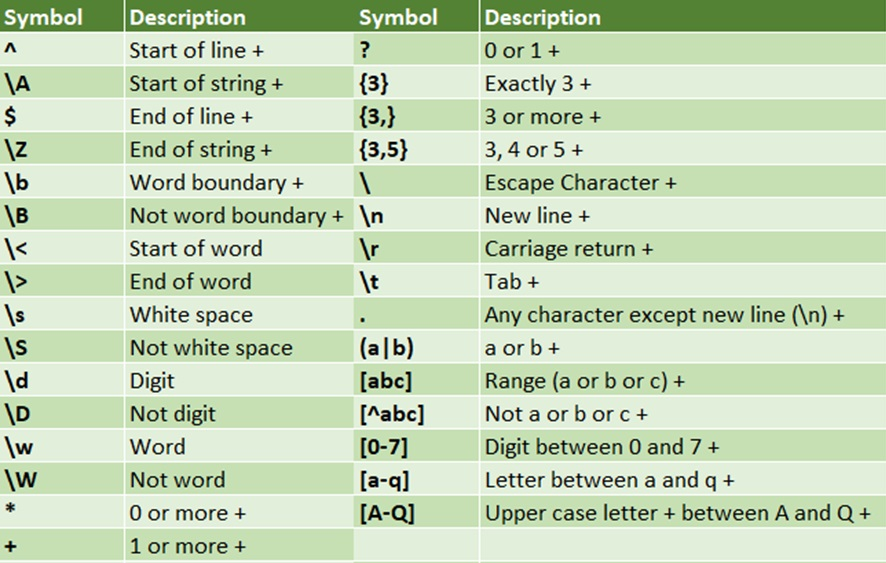
Source: https://tec-refresh.com/regex-for-beginners/

In [710]:
df['email'][0]

'Victoria@sgcancerhospitals.org'

In [711]:
p=re.match(r"(\w+\S+[A-Za-z0-9]*\S+)@{1}(\S+[A-Za-z0-9]+)\.\w{2,}", 'Victoria@sgcancerhospitals.org')
if p:
    print(p.groups()[0])
    print(p.groups()[1])

Victoria
sgcancerhospitals


In [712]:
def feat_eng(email, field):
    p=re.match(r"(\w+\S+[A-Za-z0-9]*\S+)@{1}(\S+[A-Za-z0-9]+)\.\w{2,}", email)
    return p.groups()[field]

In [713]:
df['Name'] = df['email'].apply(feat_eng, field = 0)
df['Hospital'] = df['email'].apply(feat_eng, field = 1)

In [714]:
df.drop(columns = ['email'], inplace = True)

4. Separating Input & Output features

In [670]:
df.columns

Index(['Gender', 'Age', 'Country', 'time_since_first_check', 'status', 'Name',
       'Hospital'],
      dtype='object')

5. Change text to numerical data

In [715]:
df.Gender = LabelEncoder().fit_transform(df.Gender)
df.Name = LabelEncoder().fit_transform(df.Name)
df.Hospital = LabelEncoder().fit_transform(df.Hospital)

In [716]:
df

,Gender,Age,Country,time_since_first_check,status,Name,Hospital
0,0,20,Australian,3,0,17,3
1,1,57,Australian,60,0,7,3
2,1,35,Australian,60,1,4,3
3,1,50,Australian,36,1,2,3
4,0,62,Australian,3,0,4,3
...,...,...,...,...,...,...,...
300,0,22,European,10,1,14,2
301,0,16,European,6,1,9,2
302,0,26,European,17,1,16,2
303,0,18,European,7,1,11,2


In [717]:
df['Country'].value_counts()

European      102
Australian    100
American       73
Canadian       30
Name: Country, dtype: int64

In [718]:
nat = pd.get_dummies(df['Country'])
nat

,American,Australian,Canadian,European
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
300,0,0,0,1
301,0,0,0,1
302,0,0,0,1
303,0,0,0,1


In [719]:
df = pd.concat([df, nat], axis = 1)
df.drop(columns = ['Country'], inplace = True)

In [720]:
df

,Gender,Age,time_since_first_check,status,Name,Hospital,American,Australian,Canadian,European
0,0,20,3,0,17,3,0,1,0,0
1,1,57,60,0,7,3,0,1,0,0
2,1,35,60,1,4,3,0,1,0,0
3,1,50,36,1,2,3,0,1,0,0
4,0,62,3,0,4,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
300,0,22,10,1,14,2,0,0,0,1
301,0,16,6,1,9,2,0,0,0,1
302,0,26,17,1,16,2,0,0,0,1
303,0,18,7,1,11,2,0,0,0,1


In [721]:
x = pd.concat([df.iloc[:, :4], df.iloc[:, 5:]], axis = 1)
y = pd.DataFrame(df.status)

In [722]:
x, y

(     Gender  Age  time_since_first_check  status  Hospital  American  \
 0         0   20                       3       0         3         0   
 1         1   57                      60       0         3         0   
 2         1   35                      60       1         3         0   
 3         1   50                      36       1         3         0   
 4         0   62                       3       0         3         0   
 ..      ...  ...                     ...     ...       ...       ...   
 300       0   22                      10       1         2         0   
 301       0   16                       6       1         2         0   
 302       0   26                      17       1         2         0   
 303       0   18                       7       1         2         0   
 304       0   29                      17       1         2         0   
 
      Australian  Canadian  European  
 0             1         0         0  
 1             1         0         0  
 2   

### Step 6: Checking Correlations

In [723]:
df.corr()

,Gender,Age,time_since_first_check,status,Name,Hospital,American,Australian,Canadian,European
Gender,1.000000,0.423913,-0.002637,-0.394920,-0.145858,-0.308476,0.286882,0.011911,0.234693,-0.419449
Age,0.423913,1.000000,0.148782,-0.419157,-0.260491,-0.649712,0.609331,-0.174028,0.351644,-0.599878
time_since_first_check,-0.002637,0.148782,1.000000,0.370419,-0.167847,-0.025749,0.079647,0.111518,0.026928,-0.199991
status,-0.394920,-0.419157,0.370419,1.000000,0.139755,0.313737,-0.324639,-0.090719,-0.220092,0.522794
Name,-0.145858,-0.260491,-0.167847,0.139755,1.000000,0.024122,-0.148039,-0.283412,-0.078116,0.465193
Hospital,-0.308476,-0.649712,-0.025749,0.313737,0.024122,1.000000,-0.719962,0.717008,-0.434890,0.212207
American,0.286882,0.609331,0.079647,-0.324639,-0.148039,-0.719962,1.000000,-0.391778,-0.185273,-0.397621
Australian,0.011911,-0.174028,0.111518,-0.090719,-0.283412,0.717008,-0.391778,1.000000,-0.230684,-0.495080
Canadian,0.234693,0.351644,0.026928,-0.220092,-0.078116,-0.434890,-0.185273,-0.230684,1.000000,-0.234124
European,-0.419449,-0.599878,-0.199991,0.522794,0.465193,0.212207,-0.397621,-0.495080,-0.234124,1.000000


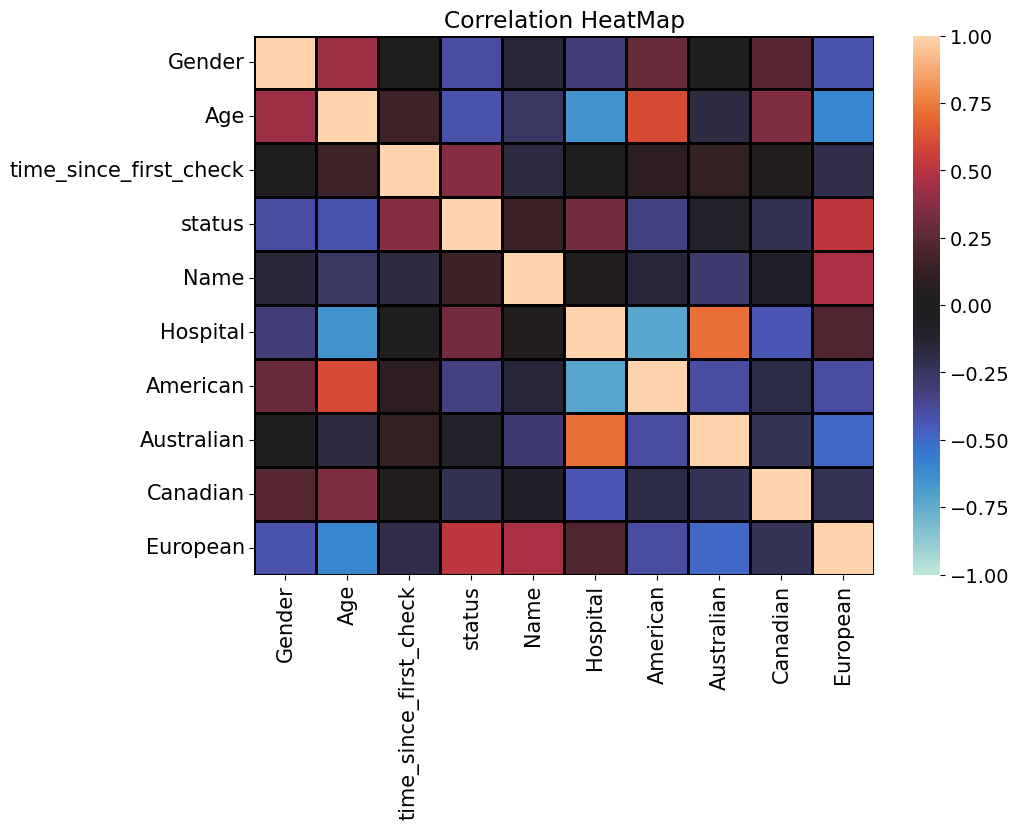

In [724]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,linewidths=2, linecolor='black')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.title('Correlation HeatMap')
plt.show()

### Step 7: Logistic Regression

In [725]:
# Splitting our data into train & test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [726]:
classify=LogisticRegression()
classify=classify.fit(x_train,y_train)
print('Logistic Regression Train Score: ',classify.score(x_train, y_train))
print('Logistic Regression Test Score: ',classify.score(x_test, y_test))
print(classification_report(y_test,classify.predict(x_test)))

Logistic Regression Train Score:  1.0
Logistic Regression Test Score:  0.9836065573770492
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.98      1.00      0.99        40

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
